Practical Work 8-2.

 Complexity of sentiment-trajectory
1. Create sentiment trajectories [1] with TextBlob as time series: Position of word in the text vs
Polarity*Subjectivity.
Represent sentiment-trajectories for different texts (3 texts approximately 3000 characters).
Make sentiment-trajectories for raw texts and for texts after preprocessing (lemmatization,
stemming, etc).

2. Calculate for each text entropy-complexity characteristic [1-2]. Depict point for each text.

In [1]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Enter text 1 (approximately 3000 characters):  It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters. "My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?" Mr. Bennet rep
Enter text 2 (approximately 3000 characters): Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul;

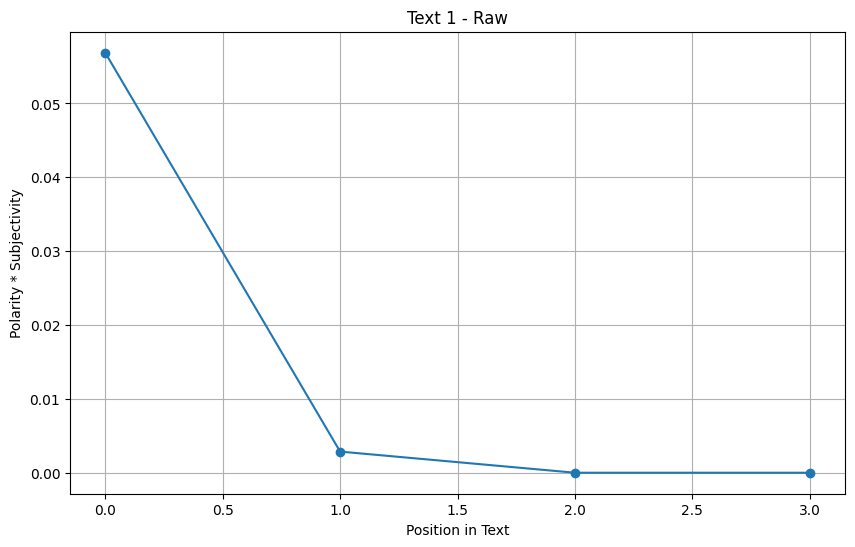

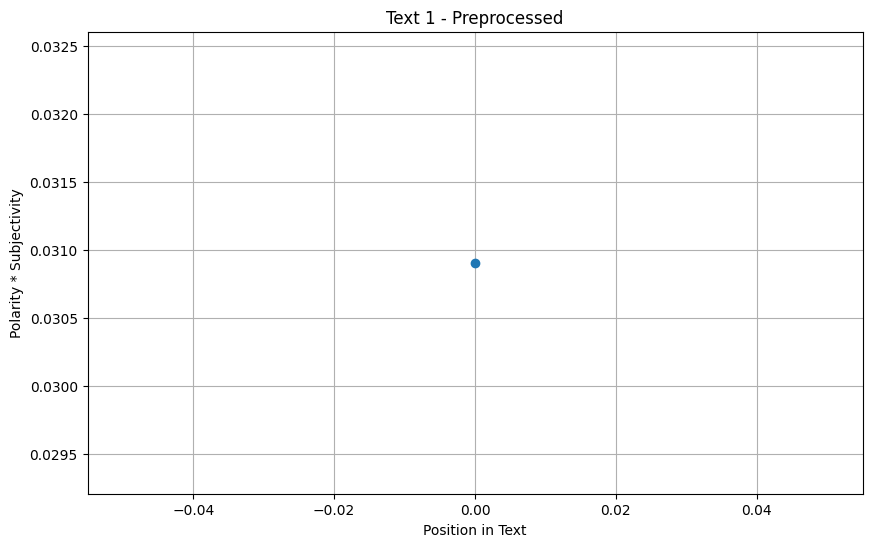

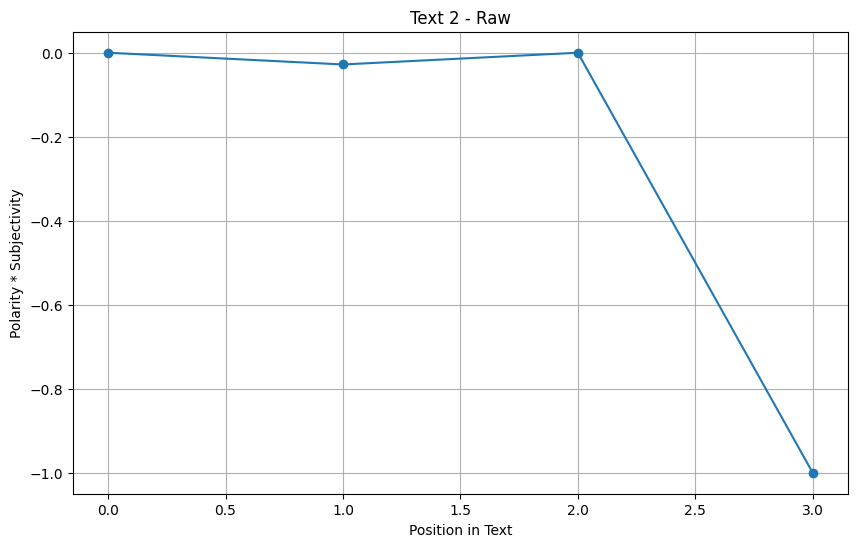

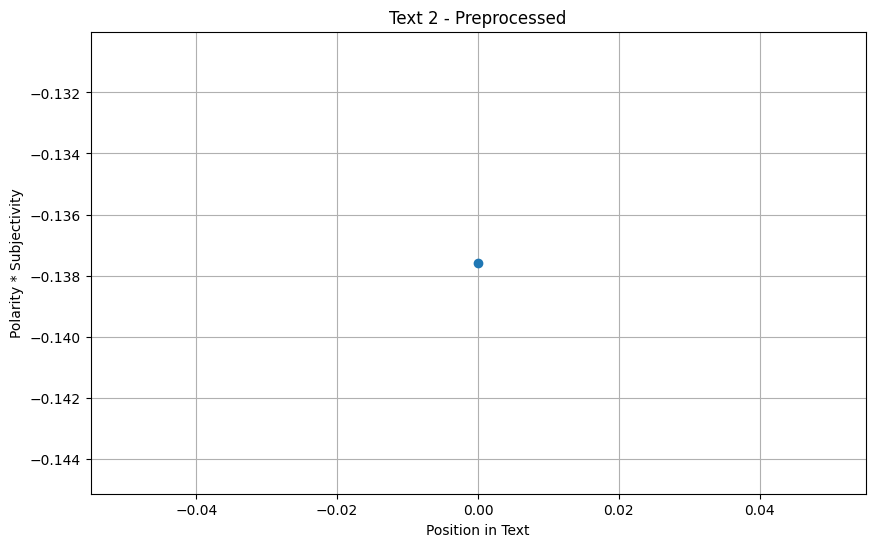

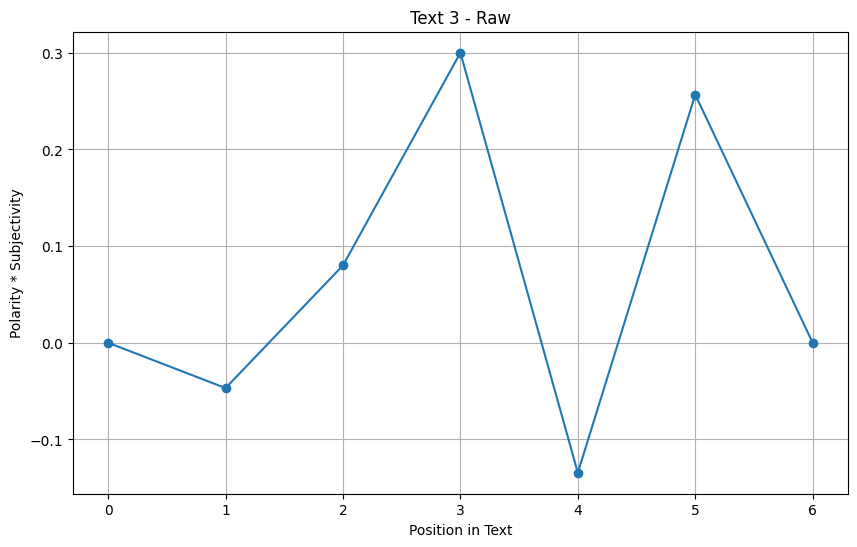

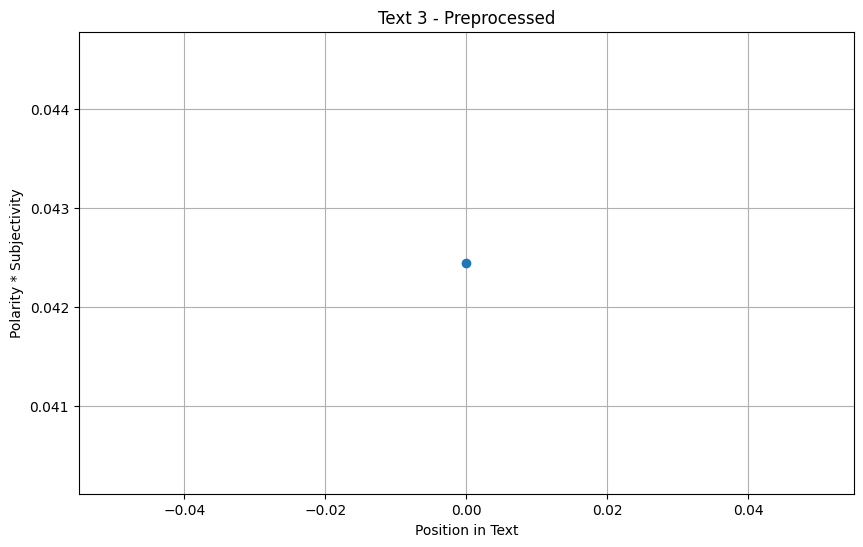

Histogram: [131.87799043   0.           0.           0.           0.
   0.           0.           0.           0.          43.95933014]
Entropy: -1168.758908881447
Histogram: [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
Entropy: -33.21928094887358
Text 1 - Raw Entropy: -1168.758908881447, Raw Complexity: 0.024240774947789586
Text 1 - Preprocessed Entropy: -33.21928094887358, Preprocessed Complexity: 0.0
Histogram: [2.5 0.  0.  0.  0.  0.  0.  0.  0.  7.5]
Entropy: -25.106499704282303
Histogram: [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
Entropy: -33.21928094887358
Text 2 - Raw Entropy: -25.106499704282303, Raw Complexity: 0.42912537831494746
Text 2 - Preprocessed Entropy: -33.21928094887358, Preprocessed Complexity: 0.0
Histogram: [3.28827183 0.         3.28827183 6.57654366 3.28827183 0.
 0.         0.         0.         6.57654366]
Entropy: -52.682412387499056
Histogram: [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
Entropy: -33.21928094887363
Text 3 - Raw Entropy: -52.682412387499056, Raw C

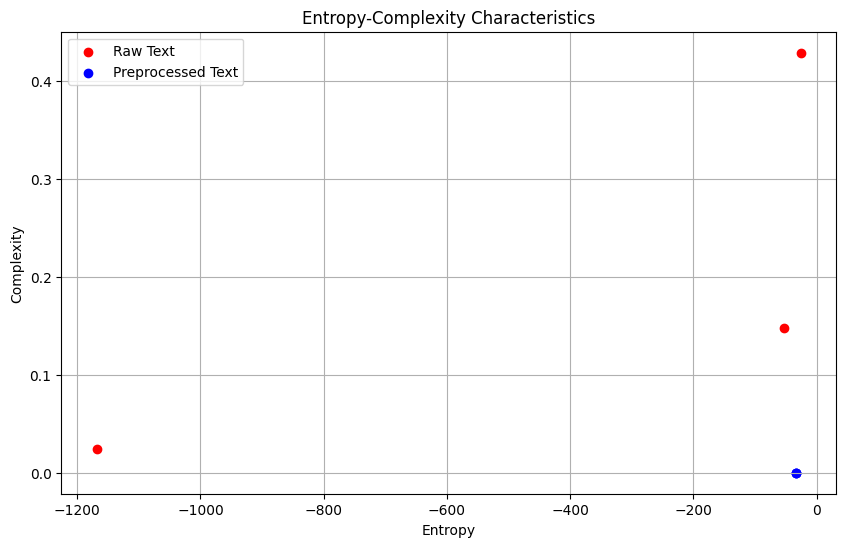

In [2]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]

    # Debug print statements
    print(f"Original text: {text[:500]}")  # Print the first 500 characters of the original text
    print(f"Filtered text: {' '.join(filtered_words)[:500]}")  # Print the first 500 characters of the filtered text

    return ' '.join(filtered_words)

# Function to calculate sentiment trajectory
def get_sentiment_trajectory(text):
    blob = TextBlob(text)
    sentiment_trajectory = [(i, sentence.sentiment.polarity * sentence.sentiment.subjectivity)
                            for i, sentence in enumerate(blob.sentences)]
    # Debug print statements
    print(f"Sentiment trajectory: {sentiment_trajectory[:10]}")  # Print the first 10 sentiment values
    return sentiment_trajectory

# Function to plot trajectory
def plot_trajectory(trajectory, title):
    if len(trajectory) > 0:
        positions, values = zip(*trajectory)
        plt.figure(figsize=(10, 6))
        plt.plot(positions, values, marker='o')
        plt.title(title)
        plt.xlabel('Position in Text')
        plt.ylabel('Polarity * Subjectivity')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data to plot for {title}")

# Function to calculate entropy
def calculate_entropy(trajectory):
    if len(trajectory) == 0:
        return 0
    values = np.array([val for _, val in trajectory])
    hist, _ = np.histogram(values, bins=10, density=True)
    entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))

    # Debug print statements
    print(f"Histogram: {hist}")  # Debug print statement
    print(f"Entropy: {entropy}")  # Debug print statement

    return entropy

# Function to calculate complexity (simplified as standard deviation)
def calculate_complexity(trajectory):
    if len(trajectory) == 0:
        return 0
    values = np.array([val for _, val in trajectory])
    return np.std(values)

# Get texts from the user
texts = []
for i in range(3):
    text = input(f"Enter text {i+1} (approximately 3000 characters): ")
    texts.append(text)

# Preprocess texts
preprocessed_texts = [preprocess_text(text) for text in texts]

# Calculate sentiment trajectories for raw and preprocessed texts
raw_trajectories = [get_sentiment_trajectory(text) for text in texts]
preprocessed_trajectories = [get_sentiment_trajectory(text) for text in preprocessed_texts]

# Plot sentiment trajectories
for i in range(3):
    plot_trajectory(raw_trajectories[i], f'Text {i+1} - Raw')
    plot_trajectory(preprocessed_trajectories[i], f'Text {i+1} - Preprocessed')

# Calculate entropy and complexity for raw and preprocessed trajectories
entropies = []
complexities = []

for i in range(3):
    raw_entropy = calculate_entropy(raw_trajectories[i])
    raw_complexity = calculate_complexity(raw_trajectories[i])

    preprocessed_entropy = calculate_entropy(preprocessed_trajectories[i])
    preprocessed_complexity = calculate_complexity(preprocessed_trajectories[i])

    entropies.append((raw_entropy, preprocessed_entropy))
    complexities.append((raw_complexity, preprocessed_complexity))

    print(f"Text {i+1} - Raw Entropy: {raw_entropy}, Raw Complexity: {raw_complexity}")
    print(f"Text {i+1} - Preprocessed Entropy: {preprocessed_entropy}, Preprocessed Complexity: {preprocessed_complexity}")

# Plot entropy-complexity points
raw_entropies, preprocessed_entropies = zip(*entropies)
raw_complexities, preprocessed_complexities = zip(*complexities)

plt.figure(figsize=(10, 6))
plt.scatter(raw_entropies, raw_complexities, color='r', label='Raw Text')
plt.scatter(preprocessed_entropies, preprocessed_complexities, color='b', label='Preprocessed Text')
plt.xlabel('Entropy')
plt.ylabel('Complexity')
plt.legend()
plt.title('Entropy-Complexity Characteristics')
plt.grid(True)
plt.show()


Enter text 1 (approximately 3000 characters): It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters. "My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?" Mr. Bennet rep
Enter text 2 (approximately 3000 characters): Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; 

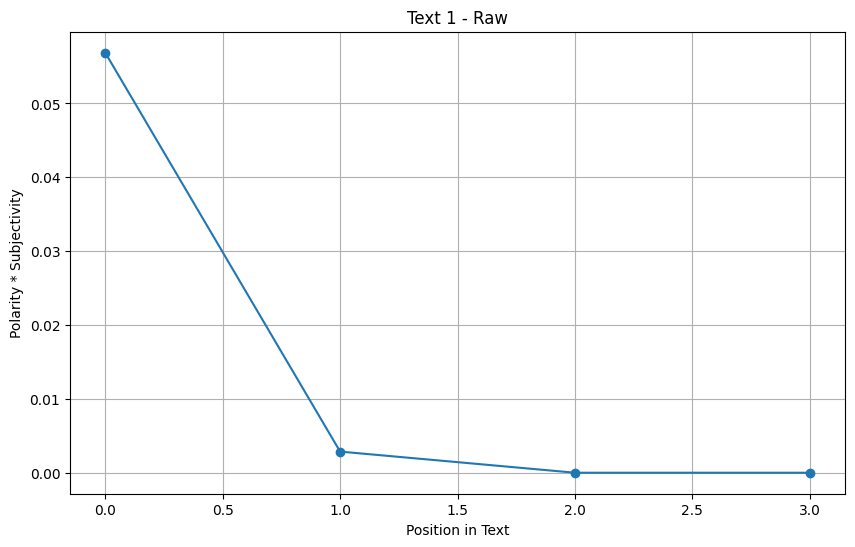

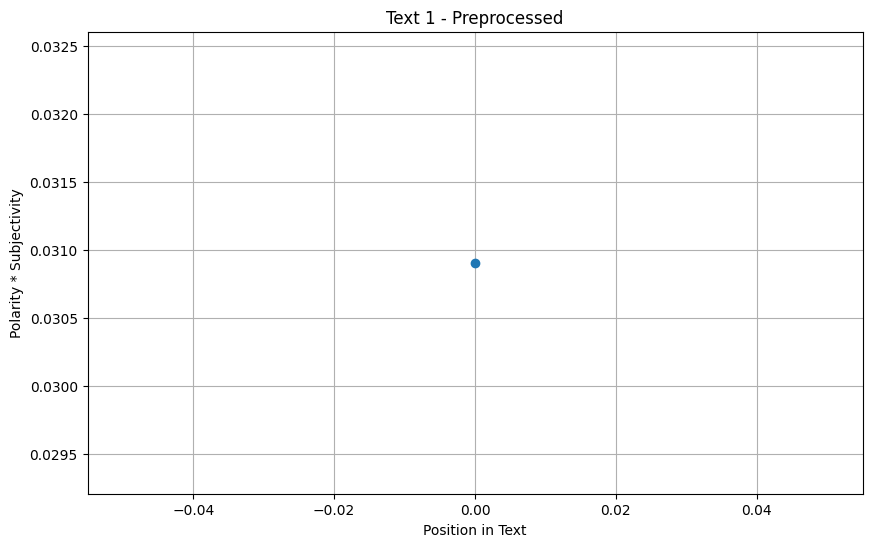

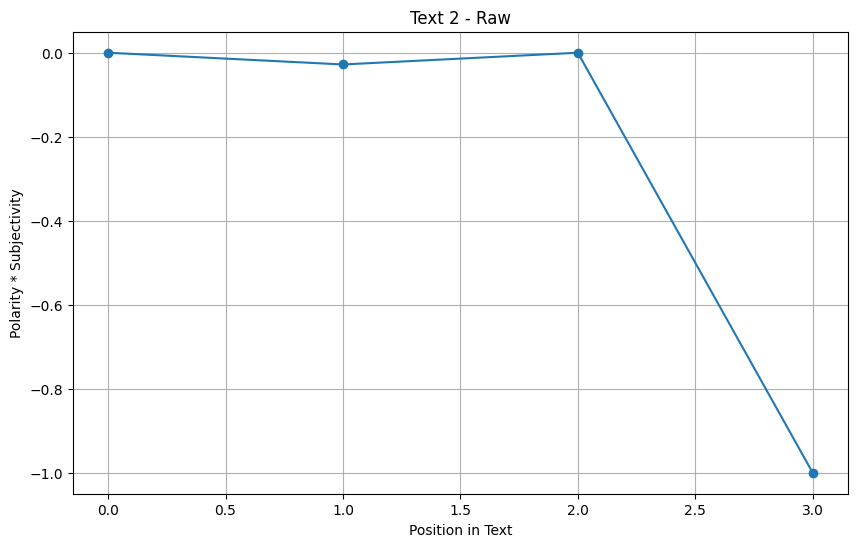

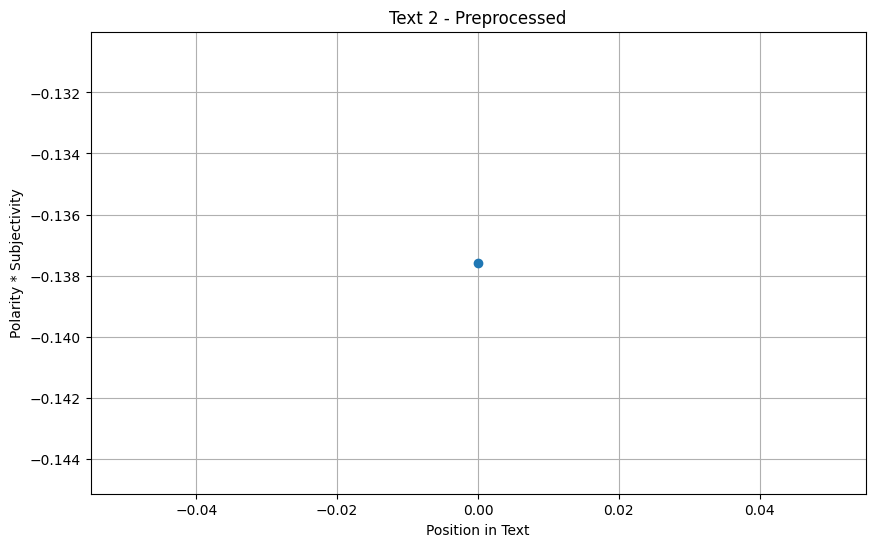

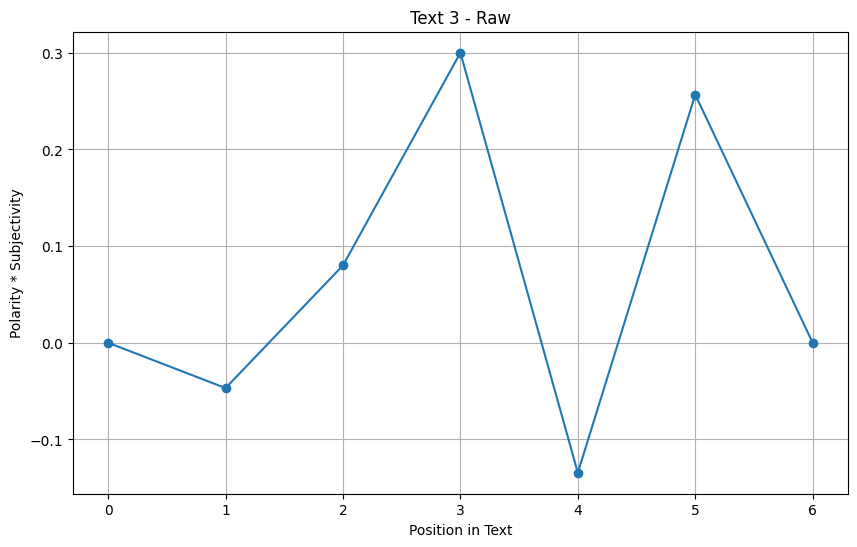

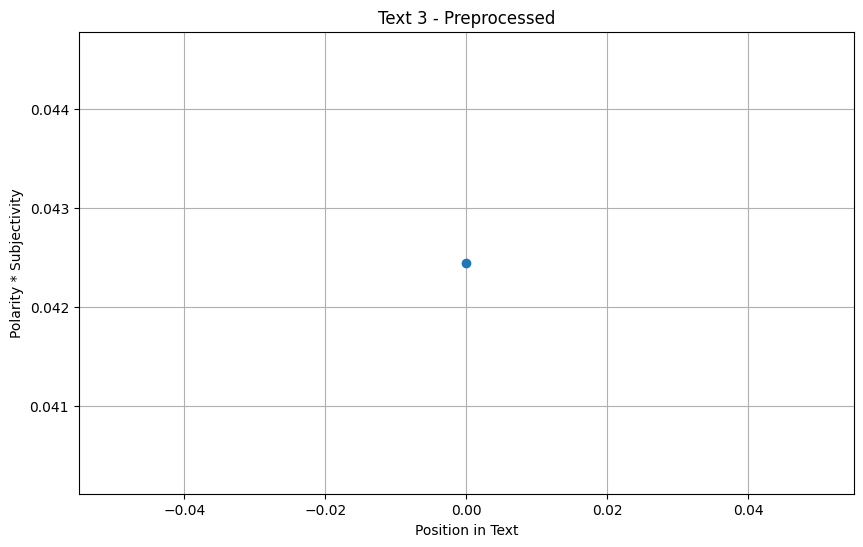

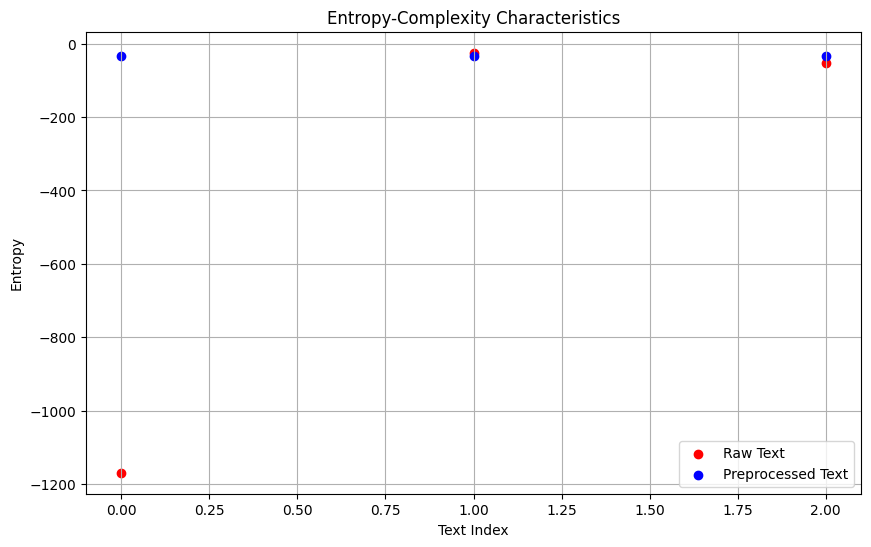

In [3]:
import textblob
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

# Function to calculate sentiment trajectory
def get_sentiment_trajectory(text):
    blob = textblob.TextBlob(text)
    sentiment_trajectory = [(i, sentence.sentiment.polarity * sentence.sentiment.subjectivity)
                            for i, sentence in enumerate(blob.sentences)]
    return sentiment_trajectory

# Function to plot trajectory
def plot_trajectory(trajectory, title):
    positions, values = zip(*trajectory)
    plt.figure(figsize=(10, 6))
    plt.plot(positions, values, marker='o')
    plt.title(title)
    plt.xlabel('Position in Text')
    plt.ylabel('Polarity * Subjectivity')
    plt.grid(True)
    plt.show()

# Function to calculate entropy
def calculate_entropy(trajectory):
    values = np.array([val for _, val in trajectory])
    hist, _ = np.histogram(values, bins=10, density=True)
    entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))
    return entropy

# Function to calculate complexity
def calculate_complexity(trajectory):
    values = np.array([val for _, val in trajectory])
    return np.std(values)

# Get texts from the user
texts = []
for i in range(3):
    text = input(f"Enter text {i+1} (approximately 3000 characters): ")
    texts.append(text)

# Preprocess texts
preprocessed_texts = [preprocess_text(text) for text in texts]

# Calculate sentiment trajectories for raw and preprocessed texts
raw_trajectories = [get_sentiment_trajectory(text) for text in texts]
preprocessed_trajectories = [get_sentiment_trajectory(text) for text in preprocessed_texts]

# Plot sentiment trajectories
for i in range(3):
    plot_trajectory(raw_trajectories[i], f'Text {i+1} - Raw')
    plot_trajectory(preprocessed_trajectories[i], f'Text {i+1} - Preprocessed')

# Calculate entropy and complexity for raw and preprocessed trajectories
raw_entropies = [calculate_entropy(trajectory) for trajectory in raw_trajectories]
preprocessed_entropies = [calculate_entropy(trajectory) for trajectory in preprocessed_trajectories]

raw_complexities = [calculate_complexity(trajectory) for trajectory in raw_trajectories]
preprocessed_complexities = [calculate_complexity(trajectory) for trajectory in preprocessed_trajectories]

# Plot entropy-complexity points
plt.figure(figsize=(10, 6))
plt.scatter([i for i in range(3)], raw_entropies, color='r', label='Raw Text')
plt.scatter([i for i in range(3)], preprocessed_entropies, color='b', label='Preprocessed Text')
plt.xlabel('Text Index')
plt.ylabel('Entropy')
plt.legend()
plt.title('Entropy-Complexity Characteristics')
plt.grid(True)
plt.show()

Enter text 1 (approximately 3000 characters): Operation Downfall was the proposed Allied plan for the invasion of the Japanese home islands near the end of World War II. The planned operation was canceled when Japan surrendered following the atomic bombings of Hiroshima and Nagasaki, the Soviet declaration of war, and the invasion of Manchuria.[1] The operation had two parts: Operation Olympic and Operation Coronet. Set to begin in November 1945, Operation Olympic was intended to capture the southern third of the southernmost main Japanese island, Kyūshū, with the recently captured island of Okinawa to be used as a staging area. In early 1946 would come Operation Coronet, the planned invasion of the Kantō Plain, near Tokyo, on the main Japanese island of Honshu. Airbases on Kyūshū captured in Operation Olympic would allow land-based air support for Operation Coronet. If Downfall had taken place, it would have been the largest amphibious operation in history, surpassing D-Day.[2]  Japan

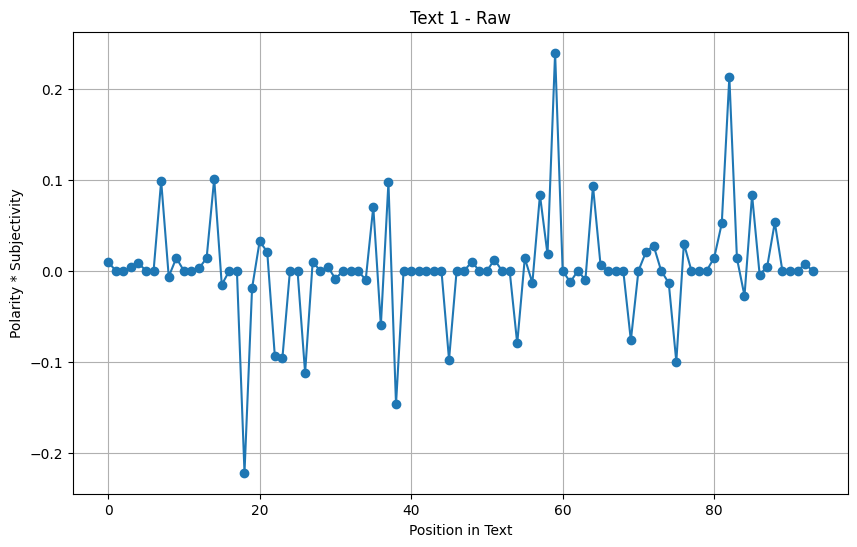

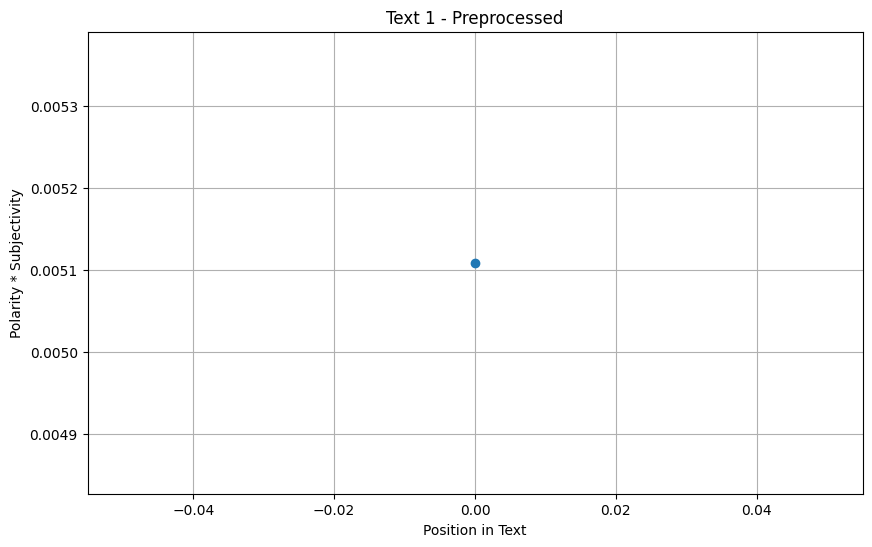

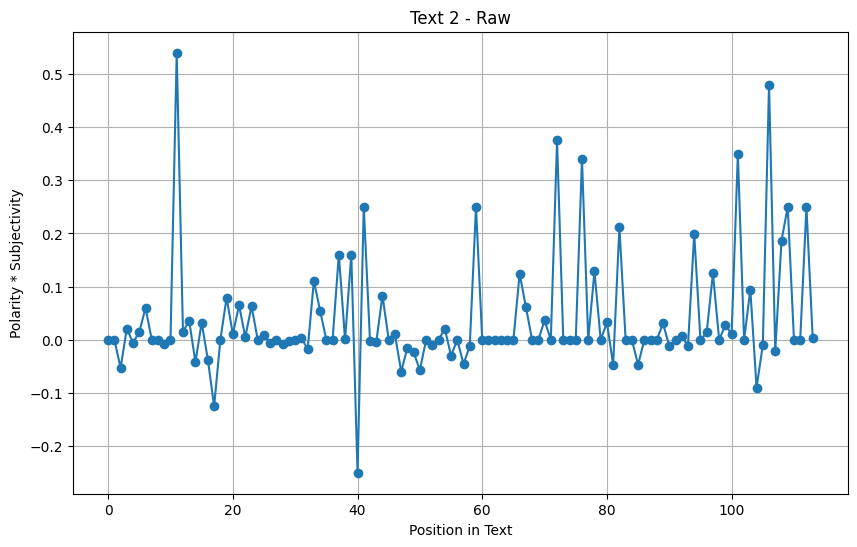

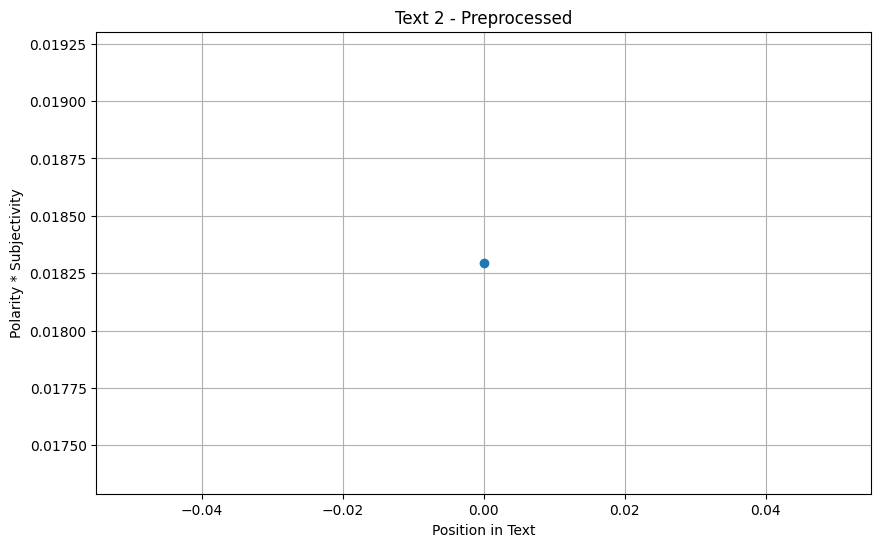

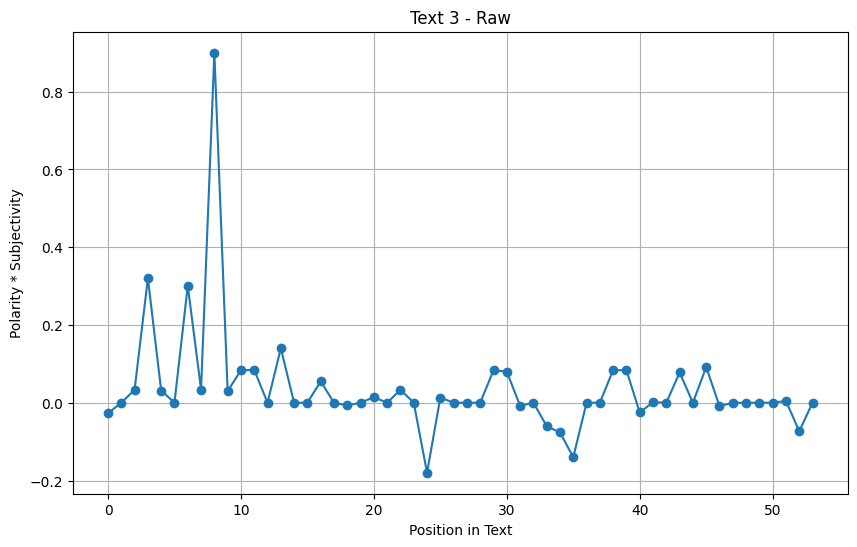

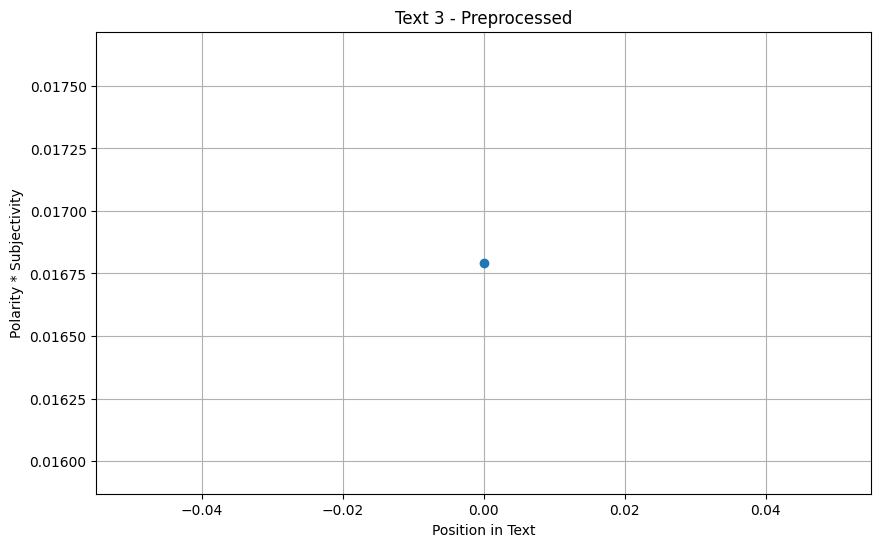

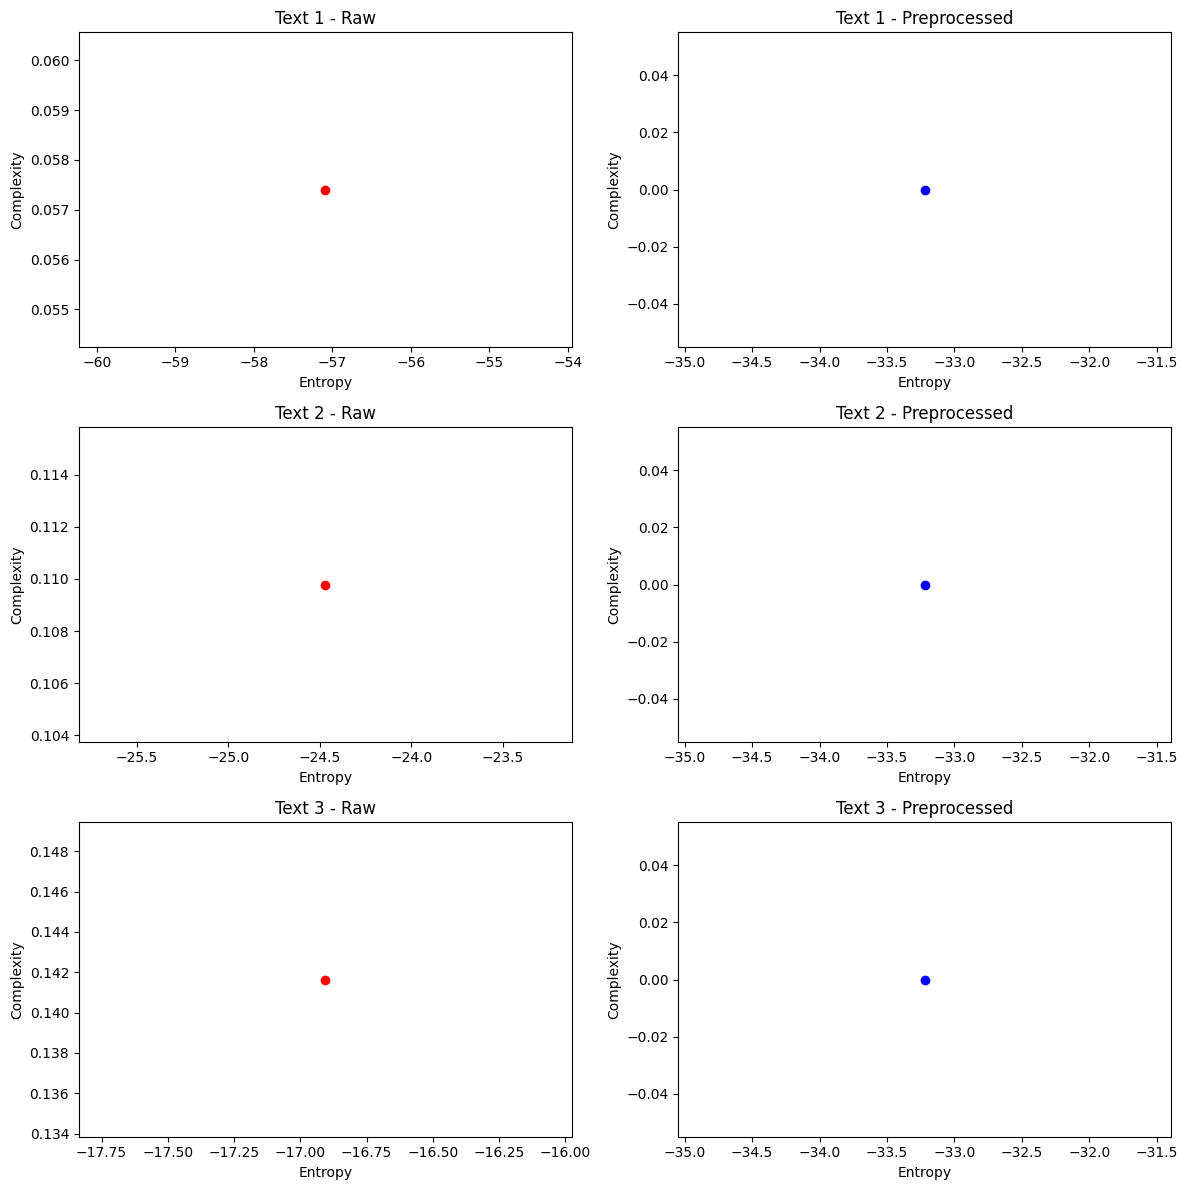

In [4]:
import textblob
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

# Function to calculate sentiment trajectory
def get_sentiment_trajectory(text):
    blob = textblob.TextBlob(text)
    sentiment_trajectory = [(i, sentence.sentiment.polarity * sentence.sentiment.subjectivity)
                            for i, sentence in enumerate(blob.sentences)]
    return sentiment_trajectory

# Function to plot trajectory
def plot_trajectory(trajectory, title):
    positions, values = zip(*trajectory)
    plt.figure(figsize=(10, 6))
    plt.plot(positions, values, marker='o')
    plt.title(title)
    plt.xlabel('Position in Text')
    plt.ylabel('Polarity * Subjectivity')
    plt.grid(True)
    plt.show()

# Get texts from the user
texts = []
for i in range(3):
    text = input(f"Enter text {i+1} (approximately 3000 characters): ")
    texts.append(text)

# Preprocess texts
preprocessed_texts = [preprocess_text(text) for text in texts]

# Calculate sentiment trajectories for raw and preprocessed texts
raw_trajectories = [get_sentiment_trajectory(text) for text in texts]
preprocessed_trajectories = [get_sentiment_trajectory(text) for text in preprocessed_texts]

# Plot sentiment trajectories
for i in range(3):
    plot_trajectory(raw_trajectories[i], f'Text {i+1} - Raw')
    plot_trajectory(preprocessed_trajectories[i], f'Text {i+1} - Preprocessed')

# Calculate entropy and complexity for raw and preprocessed trajectories
raw_entropies = [calculate_entropy(trajectory) for trajectory in raw_trajectories]
preprocessed_entropies = [calculate_entropy(trajectory) for trajectory in preprocessed_trajectories]

raw_complexities = [calculate_complexity(trajectory) for trajectory in raw_trajectories]
preprocessed_complexities = [calculate_complexity(trajectory) for trajectory in preprocessed_trajectories]

# Plot entropy-complexity points for each text
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i in range(3):
    axes[i, 0].scatter(raw_entropies[i], raw_complexities[i], color='r', label='Raw Text')
    axes[i, 0].set_xlabel('Entropy')
    axes[i, 0].set_ylabel('Complexity')
    axes[i, 0].set_title(f'Text {i+1} - Raw')

    axes[i, 1].scatter(preprocessed_entropies[i], preprocessed_complexities[i], color='b', label='Preprocessed Text')
    axes[i, 1].set_xlabel('Entropy')
    axes[i, 1].set_ylabel('Complexity')
    axes[i, 1].set_title(f'Text {i+1} - Preprocessed')

plt.tight_layout()
plt.show()
